In [106]:
'''
识别假新闻的想法：
1. 识别当前账号状态：某些帖子内的extended_entities中的url可以直接导向用户的帖子（链接全面吗？只有这个链接可以去到吗？） 有些账号的页面已经被封禁 或该推文已删除 可以将数据整理为一个csv 然后使用脚本自动访问并查看用户账号是否封禁 根据页面反馈生成不同状态列表（需要一些研究 看看页面反馈都有什么类型）进行分析  如果用户被封号 则存在假新闻风险  如果推文不存在 则需要更深分析 
⬆️❌脚本运行12小时 无反馈， ❌无法手动访问推文识别状态 工作量太大 回报不明确 

2. 假新闻在情绪上有极端性 在情绪分布比较极端的位置上找 可能有收获
⬆️✅工作流1

3. 假新闻在重大事件发生时 可能会出现 看一下在事件后的情绪反向波动可能可以找到
⬆️

4. 将情感评分排序 手动分析极端情感的帖子 
⬆️⭕️
5. 假新闻的情绪在不同类型的推文中可能呈现不同情感模式 类型包括：新闻正文，营销号，普通用户发帖（如何识别不同用户？用verified？）
⬆️⭕️
6. 对比情感得分与新闻语气（如报道性、煽动性、宣传性）之间的关系
⬆️⭕️

7. 确认一些假新闻后 识别这些新闻的模式 作为特征 因为假新闻可能都有同样的模式和类型特征 
⬆️✅工作流3

8. 结合词频 内容长度 来源 来分析特征
⬆️⭕️

9. 是否可以采集可新内容作为情绪基线 然后对标当前的情绪序列？（可能不一定，因为每个营销号的用词风格不一定一样？所以情绪可能不同？是一个有意思的方向，需要研究一下）

工作流11/08/24：
1. 找情绪区间：先确认情绪异常值 人工标注极端情绪区间 
2. 标注数据：将帖子根据事件分组 然后查看每一组的异常值 争取在每一组中都找到真和假 （需要调研 在事件发生后 到 下一件事发生前分为一组
3. 子推文情绪建模：使用所有推文（需要先用当前root推文反推所有回复和转发）将推文按按日的顺序进行分组，对每个时间段内的推文进行单独的 LDA 建模，可以得到在不同的事件框架内讨论的事件（也许？）
4.

对于root推文和非root推文的想法：
1. “大量的转发和正面情感的回复可能会增强一条推文的可信度，即使它是假的。人们往往倾向于相信被广泛转发或赞同的信息”
2. “转发和回复中可能会出现矛盾的情感信号（如支持与反对）” 可以分析子推文的情感信号 但我觉得情感可能无法完全解释
'''

'\n识别假新闻的想法：\n1. 识别当前账号状态：某些帖子内的extended_entities中的url可以直接导向用户的帖子（链接全面吗？只有这个链接可以去到吗？） 有些账号的页面已经被封禁 或该推文已删除 可以将数据整理为一个csv 然后使用脚本自动访问并查看用户账号是否封禁 根据页面反馈生成不同状态列表（需要一些研究 看看页面反馈都有什么类型）进行分析  如果用户被封号 则存在假新闻风险  如果推文不存在 则需要更深分析 \n⬆️❌脚本运行12小时 无反馈， ❌无法手动访问推文识别状态 工作量太大 回报不明确 \n\n2. 假新闻在情绪上有极端性 在情绪分布比较极端的位置上找 可能有收获\n3. 假新闻在重大事件发生时 可能会出现 看一下在事件后的情绪反向波动可能可以找到\n4. 将情感评分排序 手动分析极端情感的帖子 \n5. 假新闻的情绪在不同类型的推文中可能呈现不同情感模式 类型包括：新闻正文，营销号，普通用户发帖（如何识别不同用户？用verified？）\n6. 对比情感得分与新闻语气（如报道性、煽动性、宣传性）之间的关系\n\n7. 确认一些假新闻后 识别这些新闻的模式 作为特征 因为假新闻可能都有同样的模式和类型特征 \n8. 结合词频 内容长度 来源 来分析特征\n9. 是否可以采集可新内容作为情绪基线 然后对标当前的情绪序列？（可能不一定，因为每个营销号的用词风格不一定一样？所以情绪可能不同？是一个有意思的方向，需要研究一下）\n\n工作流11/08/24：\n1. 找情绪区间：先确认情绪异常值 人工标注极端情绪区间 \n2. 标注数据：将帖子根据事件分组 然后查看每一组的异常值 争取在每一组中都找到真和假 （需要调研 在事件发生后 到 下一件事发生前分为一组\n3. 子推文情绪建模：使用所有推文（需要先用当前root推文反推所有回复和转发）将推文按按日的顺序进行分组，对每个时间段内的推文进行单独的 LDA 建模，可以得到在不同的事件框架内讨论的事件（也许？）\n4.\n\n对于root推文和非root推文的想法：\n1. “大量的转发和正面情感的回复可能会增强一条推文的可信度，即使它是假的。人们往往倾向于相信被广泛转发或赞同的信息”\n2. “转发和回复中可能会出现矛盾的情感信号（如支持与反对）” 可以分析子推文的情感信号 但我觉得情感可


## 筛选数据
这一步骤主要思想为：将数据筛选至一个情绪比较突出的范围，并且只保留需要的列，以便后续的数据处理。

先筛选出大框架，然后根据时间序列分析.py中的可视化结果，使用阈值筛选出情绪比较突出且集中的时间范围，进行人工标注。

In [88]:
# filter data into a specific time range, keep only necessary columns
# error will come up says "please specify a format", it can be ignored.

import pandas as pd

df = pd.read_csv('../../data/processed/final_data.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
df = df[(df['created_at'] >= '2019-11-07') & (df['created_at'] <= '2020-01-24')]
df = df[['_id', 'created_at', 'display_text', 'extended_entities', 'sentiment', 'weighted_sentiment', 'dominant_topic', 'cleaned_text', 'influence_tweet_factor']]
df.head()

/var/folders/sn/vtf5wp8x6vldjnk3w88mk9zr0000gn/T/ipykernel_7646/722079748.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


,_id,created_at,display_text,extended_entities,sentiment,weighted_sentiment,dominant_topic,cleaned_text,influence_tweet_factor
15,1192617057394708480,2019-11-08 01:37:18+00:00,If that’s what the fires look like from up her...,"{'media': [{'id': 1192617049744277504, 'id_str...",0.6239,1.527748,6,fire look like nsw mid nth coast huge prayer t...,2.448706
16,1192684541913100288,2019-11-08 06:05:28+00:00,Progression of major fires today across NSW #N...,"{'media': [{'id': 1192684504340516864, 'id_str...",0.0000,0.000000,6,progression major fire today across nsw nswfires,2.974742
17,1192725213294804992,2019-11-08 08:47:05+00:00,#Smoke from #nswfires in the northeast is not ...,"{'media': [{'id': 1192725210136481794, 'id_str...",0.1154,0.270429,6,smoke nswfires northeast visible satellite ima...,2.343409
18,1192766676854435840,2019-11-08 11:31:50+00:00,This shows the dangerous conditions that have ...,"{'media': [{'id': 1192766472902168576, 'id_str...",-0.7430,-2.701052,6,show dangerous condition confronted firefighte...,3.635333
19,1192932983407202304,2019-11-08 22:32:41+00:00,Incredible vision from @NSWRFS of a crew from ...,"{'media': [{'id': 1192766472902168576, 'id_str...",-0.0276,-0.078089,6,incredible vision nswrfs crew warringah hq hil...,2.829304


In [89]:
# extract media info into a new column
import ast

def extract_media_info(extended_entities):
    if pd.isna(extended_entities) or extended_entities == '{}':
        return [], 0, None
    
    try:
        entities = ast.literal_eval(extended_entities)
        media_list = [media['media_url_https'] for media in entities.get('media', [])]
        media_count = len(media_list)
        tweet_url = entities['media'][0]['url'] if media_count > 0 else None
        return media_list, media_count, tweet_url
    except Exception as e:
        return [], 0, None

# 应用函数并创建新列
df['media_urls'], df['media_count'], df['tweet_url'] = zip(*df['extended_entities'].apply(extract_media_info))

# 删除extended_entities列
df = df.drop(columns=['extended_entities'])

# 显示前几行结果以验证处理是否正确
df.head()


,_id,created_at,display_text,sentiment,weighted_sentiment,dominant_topic,cleaned_text,influence_tweet_factor,media_urls,media_count,tweet_url
15,1192617057394708480,2019-11-08 01:37:18+00:00,If that’s what the fires look like from up her...,0.6239,1.527748,6,fire look like nsw mid nth coast huge prayer t...,2.448706,[https://pbs.twimg.com/media/EI0G41MVAAAqVzx.jpg],1,https://t.co/AlgiOgAHQI
16,1192684541913100288,2019-11-08 06:05:28+00:00,Progression of major fires today across NSW #N...,0.0000,0.000000,6,progression major fire today across nsw nswfires,2.974742,[https://pbs.twimg.com/ext_tw_video_thumb/1192...,1,https://t.co/KAZ3pW9i8O
17,1192725213294804992,2019-11-08 08:47:05+00:00,#Smoke from #nswfires in the northeast is not ...,0.1154,0.270429,6,smoke nswfires northeast visible satellite ima...,2.343409,[https://pbs.twimg.com/media/EI1pQmDWkAIbDNG.p...,2,https://t.co/eNsAxzo6Nc
18,1192766676854435840,2019-11-08 11:31:50+00:00,This shows the dangerous conditions that have ...,-0.7430,-2.701052,6,show dangerous condition confronted firefighte...,3.635333,[https://pbs.twimg.com/ext_tw_video_thumb/1192...,1,https://t.co/lIhnF8P1Qf
19,1192932983407202304,2019-11-08 22:32:41+00:00,Incredible vision from @NSWRFS of a crew from ...,-0.0276,-0.078089,6,incredible vision nswrfs crew warringah hq hil...,2.829304,[https://pbs.twimg.com/ext_tw_video_thumb/1192...,1,https://t.co/9YA4PxNqzW


In [90]:
# count media levels 
df['media_count'].value_counts()

media_count
0    112265
1     37506
2      3382
4      3018
3      1499
Name: count, dtype: int64

In [85]:
# 生成json文件供第二次LDA Modeling使用 （see second_LDA_Modeling.ipynb）
df.to_json('../../data/processed/final_data(filtered).json', orient='records')

#### 1. zoom into specific time range
When entiment on any days has a change of +/- 5.0 compared to the previous day, keep these days

找到情绪变化较大的时间段

In [91]:
# 将数据按日期分组并计算每天的总情感得分
df['date'] = df['created_at'].dt.date
daily_sentiment = df.groupby('date')['sentiment'].sum().reset_index()

# 计算每日情感变化
# 第一天的变化设置为0
daily_sentiment['sentiment_change'] = daily_sentiment['sentiment'].diff().fillna(0)

# 筛选出情感变化显著的天数
significant_changes = daily_sentiment[(daily_sentiment['sentiment_change'] >= 5.0) | 
                                      (daily_sentiment['sentiment_change'] <= -5.0)]

# 获取这些天的日期列表
significant_dates = significant_changes['date'].tolist()

# 过滤出显著情感变化日期的数据
filtered_df = df[df['date'].isin(significant_dates)]

# 删除临时的date列
filtered_df = filtered_df.drop(columns=['date'])

# 显示前几行结果以验证处理是否正确
filtered_df.head()

,_id,created_at,display_text,sentiment,weighted_sentiment,dominant_topic,cleaned_text,influence_tweet_factor,media_urls,media_count,tweet_url
131,1202428435454251009,2019-12-05 03:24:13+00:00,#LIVE: The Green Wattle Creek fire is now burn...,-0.8877,-1.270622,6,live green wattle creek fire burning emergency...,1.431364,[],0,None
132,1202443701076643842,2019-12-05 04:24:53+00:00,"That blue dot, is Sydney. The air quality is g...",-0.0516,-0.097632,6,blue dot sydney air quality getting worse resp...,1.892095,[https://pbs.twimg.com/media/EK_wKpYVAAAMK9c.jpg],1,https://t.co/4wuD2YnP1a
133,1202444946684313601,2019-12-05 04:29:50+00:00,We are officially living through the longest p...,-0.6597,-2.019142,0,officially living longest period bushfire air ...,3.060698,[https://pbs.twimg.com/media/EK_xQNNUYAIe-EC.j...,2,https://t.co/RVz3unWW6Q
134,1202479131654590464,2019-12-05 06:45:40+00:00,Here's the view from above - the North Black R...,0.5789,1.543376,6,view north black range fire near braidwood dif...,2.666050,[https://pbs.twimg.com/ext_tw_video_thumb/1202...,1,https://t.co/Wwe9BOc175
135,1202481630171947008,2019-12-05 06:55:36+00:00,I finally took the plunge and breathed a bit b...,0.4404,0.077551,0,finally took plunge breathed bit better today ...,0.176091,[https://pbs.twimg.com/media/ELASpyoU4AAqr-7.jpg],1,https://t.co/9UpFLcywam


In [92]:
filtered_df.count()

_id                       157191
created_at                157191
display_text              157191
sentiment                 157191
weighted_sentiment        157191
dominant_topic            157191
cleaned_text              157191
influence_tweet_factor    157191
media_urls                157191
media_count               157191
tweet_url                  45112
dtype: int64

#### 2. filter out low influence tweets

过滤掉影响力较低的推文

In [93]:
# 查看推文影响力的分布 找到前25%
filtered_df['influence_tweet_factor'].describe()

count    157191.000000
mean          0.327291
std           0.626942
min           0.000000
25%           0.000000
50%           0.000000
75%           0.477121
max           5.769395
Name: influence_tweet_factor, dtype: float64

In [94]:
# 去除影响力低的推文 仅保留前25%的推文 0.75 = 0.477121
filtered_new_df = filtered_df[filtered_df['influence_tweet_factor'] >= 0.477121]

In [95]:
filtered_new_df.count()

_id                       40691
created_at                40691
display_text              40691
sentiment                 40691
weighted_sentiment        40691
dominant_topic            40691
cleaned_text              40691
influence_tweet_factor    40691
media_urls                40691
media_count               40691
tweet_url                 17091
dtype: int64

#### 3. filter out sentiment outliers

过滤掉加权情感得分异常的推文

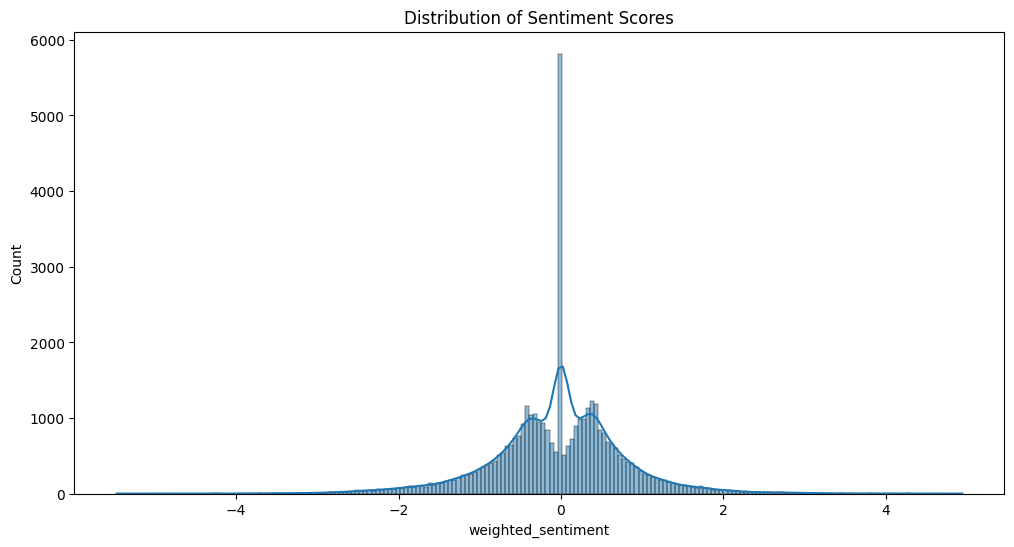

In [101]:
# 使用可视化检查结果
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(filtered_new_df['weighted_sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()


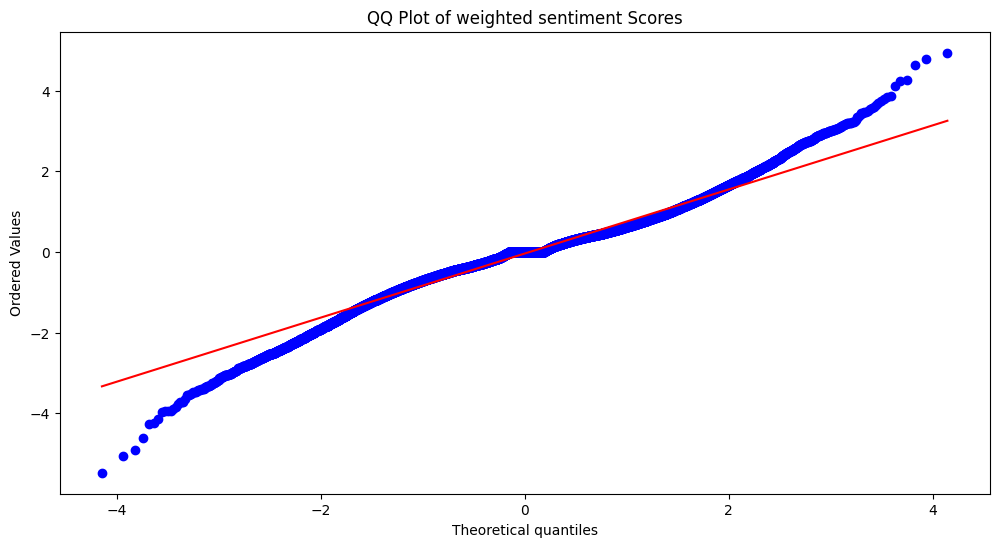

In [102]:
# 使用残差分析
from scipy.stats import probplot

plt.figure(figsize=(12, 6))
probplot(filtered_new_df['weighted_sentiment'], plot=plt)
plt.title('QQ Plot of weighted sentiment Scores')
plt.show()


#### 3.1 
上方图像表明数据在极端值上有一些偏差，但是总体来说是正态分布的。根据数据的分布，使用分位数2作为阈值，仅取得分在这个范围外的推文作为异常值来进行标注。也就是说，只保留异常值，其他的推文都被过滤掉。

In [98]:
# 使用分位数过滤掉异常值
lower_quantile = filtered_new_df['weighted_sentiment'].quantile(0.25)  # 取低于2分位数的推文 约尾25%的推文
upper_quantile = filtered_new_df['weighted_sentiment'].quantile(0.75)  # 取高于2分位数的推文 约头25%的推文

filtered_outliers_df = filtered_new_df[
    (filtered_new_df['weighted_sentiment'] < lower_quantile) |
    (filtered_new_df['weighted_sentiment'] > upper_quantile)
]

filtered_outliers_df.count()


_id                       20345
created_at                20345
display_text              20345
sentiment                 20345
weighted_sentiment        20345
dominant_topic            20345
cleaned_text              20345
influence_tweet_factor    20345
media_urls                20345
media_count               20345
tweet_url                  9116
dtype: int64

#### 4. 生成标注数据集 

1. 0值上影响力特别高的推文: 这些推文不给出情绪 但是有很高的影响力 识别这些推文肯定是一个重要方向（考虑前10%？）
2. 重要事件发生后的推文：事件发生后影响力很高的推文
3. 子topic LDA建模，从second_LDA_Medeling.ipynb中提取的主题模型，将推文分为不同的主题，然后分析每个主题的情感/影响力/情感变化以及其他因素
4. 

In [107]:
# 4.1  零值情绪推文 前10%影响力

# 筛选情感分数为0的推文
zero_sentiment_df = filtered_new_df[filtered_new_df['weighted_sentiment'] == 0]

# 计算影响力的90%分位数
influence_threshold = zero_sentiment_df['influence_tweet_factor'].quantile(0.9)

# 筛选出影响力高于阈值的推文
high_influence_zero_sentiment_df = zero_sentiment_df[zero_sentiment_df['influence_tweet_factor'] > influence_threshold]

high_influence_zero_sentiment_df.count()


_id                       541
created_at                541
display_text              541
sentiment                 541
weighted_sentiment        541
dominant_topic            541
cleaned_text              541
influence_tweet_factor    541
media_urls                541
media_count               541
tweet_url                 306
dtype: int64

In [125]:
# 4.2 重要事件发生后两天的推文 前10%影响力

# 事件列表 需要再次核实完整性和确认reference  
events = {
    '2019-09-01 00:00:00': ['大火开始', 'N'],
    '2019-10-26 00:00:00': ['Gospers大火', 'N'],
    '2019-11-08 00:00:00': ['Nymboida火灾', 'N'],
    '2019-11-11 00:00:00': ['紧急状态', 'N'],
    '2019-12-20 00:00:00': ['东吉普斯兰火', 'N'],
    '2019-12-30 00:00:00': ['吉普斯兰火', 'N'],
    '2019-12-31 00:00:00': ['火灾合并', 'N'],
    '2020-01-01 00:00:00': ['小镇被困', 'N'],
    '2020-01-02 00:00:00': ['吉普斯兰蔓延', 'N'],
    '2020-01-03 00:00:00': ['袋鼠岛火', 'N'],
    '2020-01-04 00:00:00': ['彭里斯高温', 'N'],
    '2020-01-05 00:00:00': ['贝加谷火', 'N'],
    '2020-01-06 00:00:00': ['政府基金', 'P'],
    '2020-01-15 00:00:00': ['雷阵雨缓解', 'P'],
    '2020-01-23 00:00:00': ['飞机坠毁', 'N'],
    '2020-02-09 00:00:00': ['猛烈降雨', 'P'],
    '2020-03-04 00:00:00': ['火灾扑灭', 'P'],
    '2020-05-01 00:00:00': ['最后火灾', 'P']
}


# 筛选出重要事件后2天内的推文 只保留影响力最高的前10%
from datetime import timedelta

important_event_tweets = []
for event_date, event_info in events.items():
    event_date = pd.to_datetime(event_date)
    
    # 筛选出在事件发生后2天内的推文
    event_tweets = filtered_new_df[(filtered_new_df['created_at'] >= event_date) & 
                                   (filtered_new_df['created_at'] <= event_date + timedelta(days=2))]
    
    # 筛选出影响力高于阈值的推文 仅保留前10%
    influence_threshold = event_tweets['influence_tweet_factor'].quantile(0.9)
    high_influence_event_tweets = event_tweets[event_tweets['influence_tweet_factor'] > influence_threshold]
    
    important_event_tweets.append(high_influence_event_tweets)
    
# 合并为一个DataFrame
important_event_tweets_df = pd.concat(important_event_tweets)

important_event_tweets_df.count()


_id                       3817
created_at                3817
display_text              3817
sentiment                 3817
weighted_sentiment        3817
dominant_topic            3817
cleaned_text              3817
influence_tweet_factor    3817
media_urls                3817
media_count               3817
tweet_url                 1981
event_date                   0
dtype: int64

In [126]:
# 4.3 子topic LDA建模

# 等待二次建模结果